# Enformer human validation (smaller dataset)

## Evaluate sequence-wise

In [120]:
import os

In [121]:
datadir = "../../../../data/FED"
outputdir = os.path.join(datadir, "hd5")

In [124]:
file = os.path.join(outputdir,'dataset_197k_evaluation_50.h5')
with open(file, 'rb') as config_dictionary_file:
    dataset_197k_evaluation = pickle.load(config_dictionary_file)

In [40]:
file = os.path.join(outputdir,'summarized_metrics.h5')
with open(file, 'rb') as config_dictionary_file:
    summarized_metrics = pickle.load(config_dictionary_file)

In [113]:
# Download targets from Basenji2 dataset 
# Cite: Kelley et al Cross-species regulatory sequence activity prediction. PLoS Comput. Biol. 16, e1008050 (2020).
targets_txt = 'https://raw.githubusercontent.com/calico/basenji/master/manuscripts/cross2020/targets_human.txt'
df_targets = pd.read_csv(targets_txt, sep='\t')
df_targets

suppl = pd.ExcelFile(os.path.join(datadir, "enformer_suppl.xlsx"))
print(suppl.sheet_names)
suppl_human = suppl.parse(suppl.sheet_names[1])
suppl_mouse = suppl.parse(suppl.sheet_names[2])
suppl_human["organism"] = "human"
suppl_mouse["organism"] = "mouse"
frames = [suppl_human, suppl_mouse]
suppl_df = pd.concat(frames)


file = os.path.join(outputdir,'suppl_df.h5')
with open(file, 'wb') as config_dictionary_file:
    pickle.dump(suppl_df, config_dictionary_file)

['Supplementary Table 1', 'Supplementary Table 2', 'Supplementary Table 3']


# Plot sequences summary

In [114]:
ordered_assays = suppl_df[suppl_df["organism"] == "human"]["assay_type"]
ordered_assays_full = suppl_df[suppl_df["organism"] == "human"]["target"]

### How many tracks per assay type? 

In [115]:
pd.DataFrame(suppl_df[suppl_df["organism"] == "human"].groupby("assay_type").count()["index"])

,index
assay_type,
ATAC,10
CAGE,638
CHIP,3991
DNASE,674


In [131]:
def get_sequence_evaluation_df(i,dataset_197k_evaluation, ordered_assays ):
    # Create dataframe for plotting
    df = pd.DataFrame()
    # Add sequence
    df["sequence"] = np.repeat(i,len(ordered_assays))
    # Add assay
    df["assay"] = ordered_assays
    df["full"] = ordered_assays_full
    # Add pearson values 
    df["pearson"] = (dataset_197k_evaluation[i]["PearsonR"])
    return(df)

In [119]:
dataset_197k_evaluation

[{'sequence': <tf.Tensor: shape=(1, 196608, 4), dtype=float32, numpy=
  array([[[0., 1., 0., 0.],
          [0., 1., 0., 0.],
          [0., 0., 0., 1.],
          ...,
          [1., 0., 0., 0.],
          [0., 0., 0., 1.],
          [0., 0., 0., 1.]]], dtype=float32)>,
  'target': <tf.Tensor: shape=(896, 5313), dtype=float32, numpy=
  array([[0.09924316, 0.0927124 , 0.01834106, ..., 0.        , 0.        ,
          0.        ],
         [0.11126709, 0.1685791 , 0.03396606, ..., 0.        , 0.984375  ,
          0.        ],
         [0.14318848, 0.23217773, 0.01850891, ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.00662994, 0.01672363, 0.00756454, ..., 0.01852417, 0.11566162,
          0.        ],
         [0.00411224, 0.00155735, 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.06958008, 0.03845215, 0.04312134, ..., 0.        , 0.        ,
          0.        ]], dtype=float32)>,
  'interval': Interval(chrom='chr6', start=

In [132]:
final_df = pd.DataFrame()
for i in range(50):
    df = get_sequence_evaluation_df(i,dataset_197k_evaluation, ordered_assays)
    print(i)
    final_df = pd.concat([final_df, df])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [101]:
df = final_df[(final_df["assay"]  == "DNASE")]

In [102]:
df.group

AttributeError: 'DataFrame' object has no attribute 'group'

In [89]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="assay", style="time")


,sequence,assay,full,pearson
0,1,DNASE,DNase/cerebellum male adult (27 years) and mal...,0.908884
1,1,DNASE,DNase/frontal cortex male adult (27 years) and...,0.864643
2,1,DNASE,DNase/chorion,0.799596
3,1,DNASE,DNase/Ishikawa treated with 0.02% dimethyl sul...,0.864542
4,1,DNASE,DNase/GM03348,0.907159
...,...,...,...,...
5308,1,CAGE,CAGE/epithelioid sarcoma cell line:HS-ES-2R,0.074953
5309,1,CAGE,CAGE/squamous cell lung carcinoma cell line:RE...,0.212525
5310,1,CAGE,CAGE/gastric cancer cell line:GSS,0.139943
5311,1,CAGE,CAGE/carcinoid cell line:NCI-H727,0.195972


In [111]:
final_df

,sequence,assay,full,pearson
0,1,DNASE,DNase/cerebellum male adult (27 years) and mal...,0.908884
1,1,DNASE,DNase/frontal cortex male adult (27 years) and...,0.864643
2,1,DNASE,DNase/chorion,0.799596
3,1,DNASE,DNase/Ishikawa treated with 0.02% dimethyl sul...,0.864542
4,1,DNASE,DNase/GM03348,0.907159
...,...,...,...,...
5308,1,CAGE,CAGE/epithelioid sarcoma cell line:HS-ES-2R,0.671800
5309,1,CAGE,CAGE/squamous cell lung carcinoma cell line:RE...,0.673780
5310,1,CAGE,CAGE/gastric cancer cell line:GSS,0.515948
5311,1,CAGE,CAGE/carcinoid cell line:NCI-H727,0.819185


In [135]:
final_df[final_df["sequence"]==1]

,sequence,assay,full,pearson
0,1,DNASE,DNase/cerebellum male adult (27 years) and mal...,0.630755
1,1,DNASE,DNase/frontal cortex male adult (27 years) and...,0.747282
2,1,DNASE,DNase/chorion,0.536187
3,1,DNASE,DNase/Ishikawa treated with 0.02% dimethyl sul...,0.688079
4,1,DNASE,DNase/GM03348,0.788831
...,...,...,...,...
5308,1,CAGE,CAGE/epithelioid sarcoma cell line:HS-ES-2R,0.143140
5309,1,CAGE,CAGE/squamous cell lung carcinoma cell line:RE...,0.203163
5310,1,CAGE,CAGE/gastric cancer cell line:GSS,0.133375
5311,1,CAGE,CAGE/carcinoid cell line:NCI-H727,0.391748


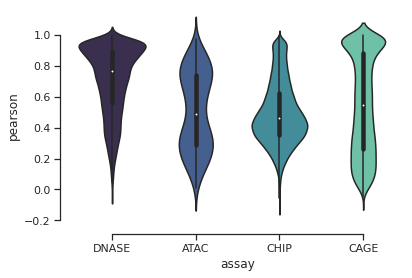

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
sns.violinplot(x="assay", y="pearson",  palette="mako", data=final_df)

sns.despine(offset=10, trim=True)

In [62]:
penguins = sns.load_dataset("penguins")

In [105]:
from datetime import datetime
now = datetime.now().time() # time object

print("now =", now)
print("type(now) =", type(now))

now = 11:23:43.227627
type(now) = <class 'datetime.time'>


In [74]:
final_df

,sequence,assay,pearson
0,1,DNASE,0.908884
1,1,DNASE,0.864643
2,1,DNASE,0.799596
3,1,DNASE,0.864542
4,1,DNASE,0.907159
...,...,...,...
5308,1,CAGE,0.074953
5309,1,CAGE,0.212525
5310,1,CAGE,0.139943
5311,1,CAGE,0.195972


ValueError: cannot reindex from a duplicate axis

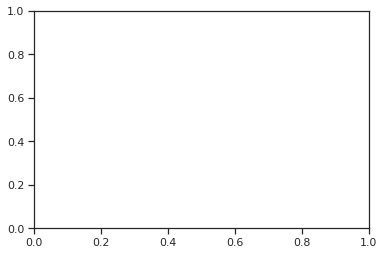

In [71]:
sns.ecdfplot(data=final_df, x="pearson")

In [ ]:
# Load previous validation dictionary
enformer_dict_file = os.path.join(outputdir,'00_enformer_dict_seqs.h5')

with open(enformer_dict_file, 'rb') as config_dictionary_file:
    human_validation_dict = pickle.load(config_dictionary_file)

In [ ]:
human_validation_dict

In [58]:
# ------------- OLD 

### PLOT: Distributions of pearson correlation coefficients per assay 

In [48]:
# assuming the values are in order of assay (TODO check) 
assay_list = list(suppl_df["assay_type"])
pearson_per_assay = list(metrics_human[0]["PearsonR"].numpy())
data_tuples = list(zip(assay_list,pearson_per_assay))
df_pearson_assay = pd.DataFrame(data_tuples, columns=['assay','pearson'])
df_pearson_assay["pearson"]
df = df_pearson_assay
df = df.astype({"assay": str, "pearson": float})
df

,assay,pearson
0,DNASE,0.721934
1,DNASE,0.841213
2,DNASE,0.861721
3,DNASE,0.658862
4,DNASE,0.836295
...,...,...
5308,CAGE,0.074953
5309,CAGE,0.212525
5310,CAGE,0.139943
5311,CAGE,0.195972


In [49]:
df.groupby("assay").mean()

,pearson
assay,
ATAC,0.451542
CAGE,0.366233
CHIP,0.507181
DNASE,0.682044


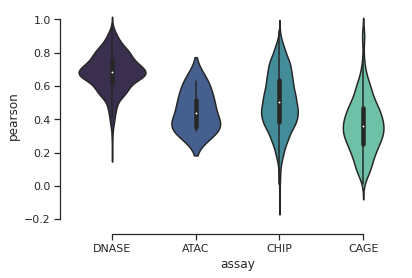

In [50]:
df

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.violinplot(x="assay", y="pearson",  palette="mako", linewidth=1.5,
            data=df)
sns.despine(offset=10, trim=True)

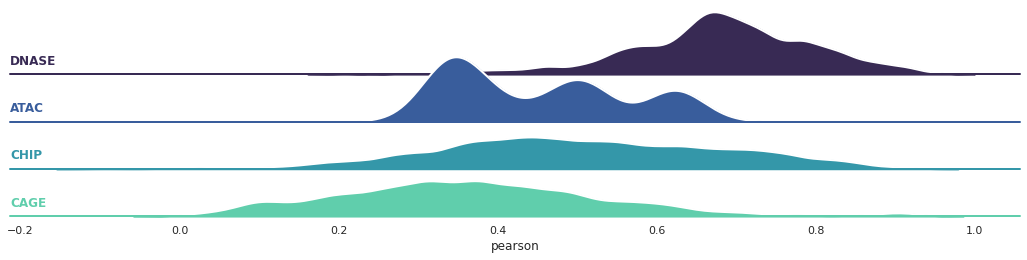

In [51]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize 
g = sns.FacetGrid(df, row="assay", hue="assay", aspect=15, height=1, palette="mako")

# Draw the densities in a few steps
g.map(sns.kdeplot, "pearson",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "pearson", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "pearson")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.3)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# OLD (do not delete) - prepare  dictionary intervals

## Check if the sequences are in order

In [ ]:
df = pd.read_csv(human_sequences, memory_map=True, header=None, index_col=False, delimiter="\t")
# keep only validation intervals 
validation_intervals= df[df[3]=="valid"]
#validation_intervals = validation_intervals.head()
# create list with interval
interval_list = list()
validation_intervals.apply(lambda row : interval_list.append(kipoiseq.Interval(row[0],row[1], row[2])), axis = 1)

In [ ]:
# Create dictionary for search (can be improved! quite slow)
human_validation_dict = {}
for interval in interval_list: 
    sequence = one_hot_encode(fasta_extractor.extract(interval))
    human_validation_dict[interval] = sequence

In [ ]:
# Step 1
import pickle

enformer_dict_file = os.path.join(outputdir,'00_enformer_dict_seqs.h5')
# Step 2
with open(enformer_dict_file, 'wb') as config_dictionary_file:
    pickle.dump(human_validation_dict, config_dictionary_file)
    
# -------- read -------
with open(enformer_dict_file, 'rb') as config_dictionary_file:
    config_dictionary = pickle.load(config_dictionary_file)

print(config_dictionary)